In [3]:
library(ggplot2)
#library(gridExtra)
#library(ggpubr)

In [3]:
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}



In [2]:
mylegend<-g_legend(p1)

p3 <- grid.arrange(arrangeGrob(p1 + theme(legend.position="none"),
                         p2 + theme(legend.position="none"),
                         nrow=1),
             mylegend, nrow=2,heights=c(10, 1))

ERROR: Error in g_legend(p1): could not find function "g_legend"


In [5]:
## corrupt and gene number
dat.summary.corrupt <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/dat.summary.corrupt.rds")
dat.summary.gene <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/dat.summary.gene_number.corrupt=0.25.rds")

In [46]:
p.corrupt <- ggplot(dat.summary.corrupt, aes(x=corrupt_rate_list, y=cor, group=method, color=method)) + 
    geom_errorbar(aes(ymin=cor-0.5*sd, ymax=cor+0.5*sd), width=.01,size=.5) +
    geom_line(size=2) + geom_point()+
   scale_color_brewer(palette="Paired")+theme_minimal() +
xlab("Non-zero Expression Corruption Rate") + ylab('Correlation between truth and prediction')+
theme(
axis.title.x = element_text(size=12, face="bold"),
axis.title.y = element_text(size=12, face="bold"),
    legend.text = element_text(size = 12),
    axis.text=element_text(size=12)
)+ ylim(-1,1) + xlim(0,1)


p.gene <- ggplot(dat.summary.gene, aes(x=gene_number_list, y=cor, group=method, color=method)) + 
    geom_errorbar(aes(ymin=cor-0.5*sd, ymax=cor+0.5*sd), width=15,size=.5) +
    geom_line(size=2) + geom_point()+
   scale_color_brewer(palette="Paired")+theme_minimal()+
xlab("Signature Gene Number") + 
#ylab('Correlation between truth and prediction')+
theme(
axis.title.x = element_text(size=12, face="bold"),
    legend.text = element_text(size = 12),
    axis.text=element_text(size=12),
axis.title.y = element_blank()
)+ ylim(0,1) 

In [35]:
mylegend<-g_legend(p.corrupt)

pdf('~/zhao-data/sc_immune/sc_immune/benchmarking/corrupt_gene.pdf')
p.combine <- grid.arrange(arrangeGrob(p.corrupt + theme(legend.position="none"),
                         p.gene + theme(legend.position="none"),
                         nrow=1),
             mylegend, nrow=2,heights=c(10, 1))
dev.off()

Warning message:
“Removed 241 row(s) containing missing values (geom_path).”
Warning message:
“Removed 241 rows containing missing values (geom_point).”
Warning message:
“Removed 241 row(s) containing missing values (geom_path).”
Warning message:
“Removed 241 rows containing missing values (geom_point).”


png 
  2

In [ ]:
#pdf('~/zhao-data/sc_immune/sc_immune/benchmarking/corrupt_gene.pdf')
pdf('~/zhao-data/sc_immune/sc_immune/benchmarking/corrupt_gene.pdf', width = 12, height = 5)
ggarrange(p.corrupt, p.gene, ncol=2, nrow=1, common.legend = TRUE, legend="bottom")
dev.off()

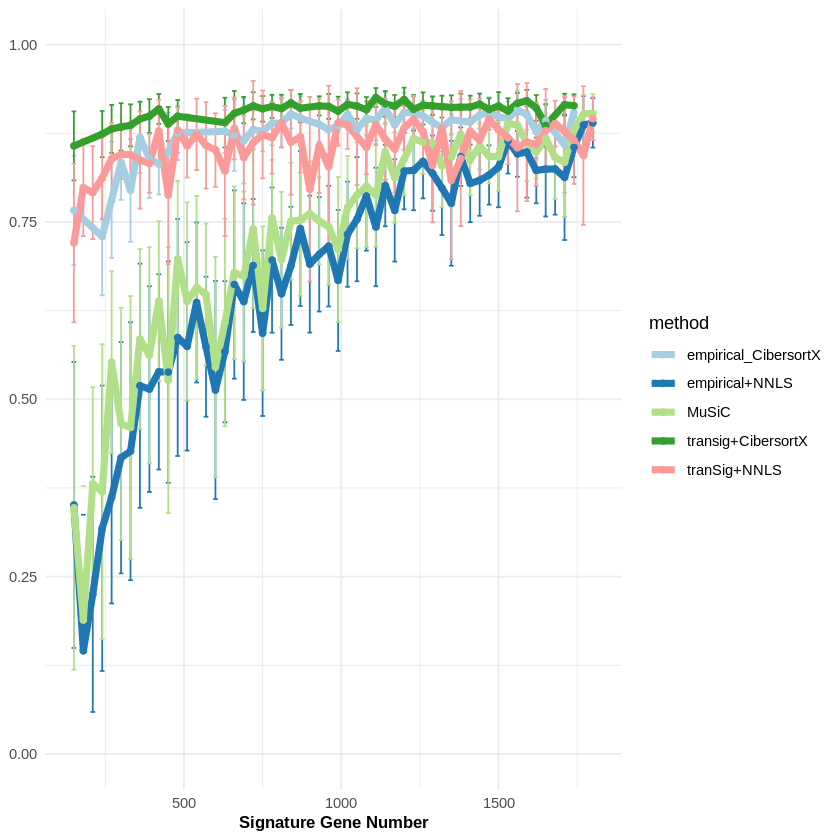

In [40]:
p.gene

Warning message:
“Removed 241 row(s) containing missing values (geom_path).”
Warning message:
“Removed 241 rows containing missing values (geom_point).”


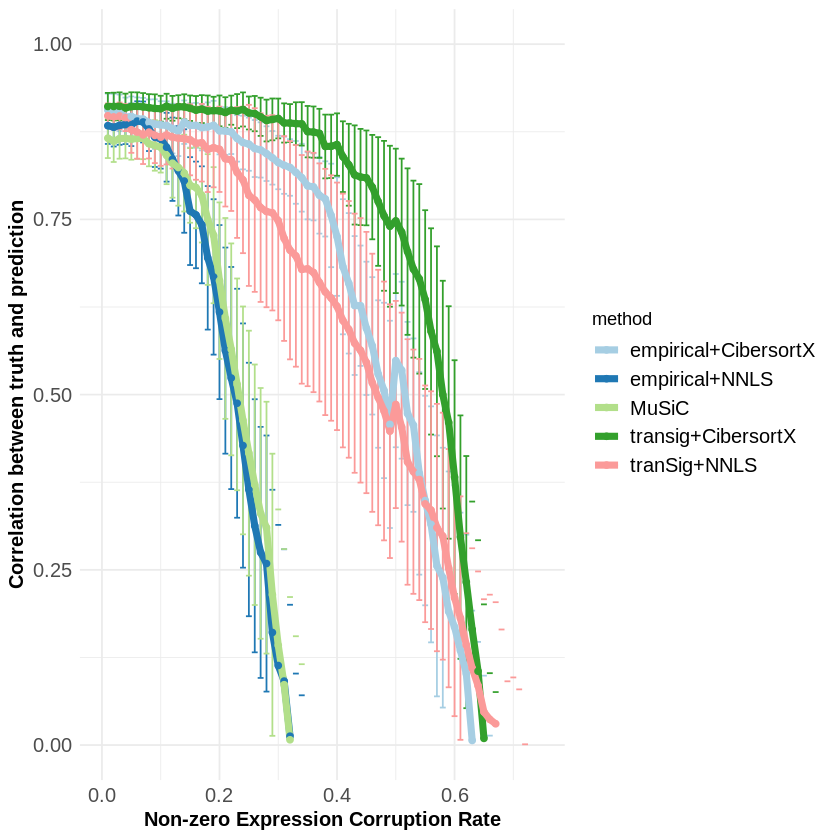

In [47]:
p.corrupt

In [ ]:
## unbalanced
summary.info <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/summary.info.unbalanced.corrupt=0.25.rds")

In [ ]:
i=1
scatter.df <- data.frame(tranSig = as.vector(summary.info$z_tranSig[[i]]),
                         music = as.vector(summary.info$z_music[[i]]),
                         empirical = as.vector(summary.info$z_empirical[[i]]),
                         transig.cibersortx = as.vector(summary.info$z_transig.cibersortx[[i]]),
                         empirical.cibersortx = as.vector(summary.info$z_empirical.cibersortx[[i]]),
                         true = as.vector(summary.info$z_true[[i]]),
                         celltype = rep(paste0('celltype',c(1:8)),each = 200))

In [ ]:
p <- list()

p[[1]]<-ggplot(scatter.df, aes(x=true, y = empirical.cibersortx, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+ ylab('empirical+CibersortX')
p[[2]]<-ggplot(scatter.df, aes(x=true, y = empirical, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+ ylab('empirical+NNLS')
p[[3]]<-ggplot(scatter.df, aes(x=true, y = music, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+ ylab('MuSiC')
p[[4]]<-ggplot(scatter.df, aes(x=true, y = transig.cibersortx, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5)+ ylab('transig+CibersortX')
p[[5]]<-ggplot(scatter.df, aes(x=true, y = tranSig, color = celltype))+geom_point()+ coord_fixed(ratio = 1)+ xlim(0,.5)+ ylim(0,.5) + ylab('transig+NNLS')



pdf('~/zhao-data/sc_immune/sc_immune/benchmarking/unbalanced.pdf', width = 12, height = 3)
ggarrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]], ncol=5, nrow=1, common.legend = TRUE, legend="bottom")
dev.off()

In [1]:
## tissue number
dat.summary.tissue <- readRDS("/gpfs/ysm/pi/zhao-data/wd262/sc_immune/write/simulation_rst/summary.info/dat.summary.tissue_number.corrupt=0.25.rds")

In [5]:
pdf('~/zhao-data/sc_immune/sc_immune/benchmarking/tissue.pdf', width = 7, height = 5)
ggplot(dat.summary.tissue, aes(x=tissue_number_list, y=cor, group=method, color=method)) + 
    geom_errorbar(aes(ymin=cor-0.5*sd, ymax=cor+0.5*sd), width=.5,size=.5) +
    geom_line(size=2) + geom_point()+
   scale_color_brewer(palette="Paired")+theme_minimal()+
xlab("Tissue Number") + ylab('Correlation between truth and prediction')+
theme(
axis.title.x = element_text(size=12, face="bold"),
axis.title.y = element_text(size=12, face="bold"),
    legend.text = element_text(size = 12),
    axis.text=element_text(size=12)
)+ ylim(0,1) 
dev.off()

png 
  2